# Multiple Input Single Output LSTM Prediction
### Training an LSTM model to predict a single output with multiple input features.
## Stock Market Close Price Prediction-
In this example, we are going to be predicting the Close price of a stock, based on other features like the Open price, High price, Low price.
<br>
<br>
Input features for the model - **'Open', 'High' and 'Low'**
<br>
Output of the model - **'Close'**
<br>
<br>
I'm just using a Dataset provided to me as a part of my **Data Analytics** Course in college (**UE20CS305**)

## 1) Importing Libraries and Dataset

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import datetime
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from packaging import version
import numpy as np

In [22]:
df = pd.read_csv('train.csv')
df['Date'] = df['Date'].astype('datetime64[ns]') #For better plots
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


# 2) Scaling
## Scaling the data before sending for train/test split

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
openc = scaler.fit_transform(df['Open'].values.reshape(-1,1))
high = scaler.fit_transform(df['High'].values.reshape(-1,1))
low = scaler.fit_transform(df['Low'].values.reshape(-1,1))
close = scaler.fit_transform(df['Close'].values.reshape(-1,1))
#volume = scaler.fit_transform(df['Volume'].values.reshape(-1,1))
#can include vol also

## 3) Splitting as Train/Test

In [4]:
training_data_len = int(df.shape[0] * 0.78)
testing_data_len = df.shape[0] - training_data_len
open_train = openc[0:training_data_len].reshape(training_data_len,1,1)
open_test = openc[training_data_len:].reshape(testing_data_len,1,1)

high_train = high[0:training_data_len].reshape(training_data_len,1,1)
high_test = high[training_data_len:].reshape(testing_data_len,1,1)

low_train = low[0:training_data_len].reshape(training_data_len,1,1)
low_test = low[training_data_len:].reshape(testing_data_len,1,1)

# volume_train = volume[0:training_data_len].reshape(training_data_len,1,1)
# volume_test = volume[training_data_len:].reshape(testing_data_len,1,1)

close_train = close[0:training_data_len].reshape(training_data_len,1,1)
close_test = close[training_data_len:].reshape(testing_data_len,1,1)

# 4) Making LSTM Model

### 4.1) Creating the model
Creating the model and specifying what we want the input features and output feature to be

In [8]:
openK = tf.keras.Input(shape=(1,1),name='openK')
highK = tf.keras.Input(shape=(1,1),name='highK')
lowK = tf.keras.Input(shape=(1,1),name='lowK')
#volK = tf.keras.Input(shape=(1,1),name='volK')

openLayers = LSTM(128,return_sequences=False)(openK)
highLayers = LSTM(128,return_sequences=False)(highK)
lowLayers = LSTM(128,return_sequences=False)(lowK)
#volLayers = LSTM(128,return_sequences=False)(volK)

#output = tf.keras.layers.concatenate(inputs=[openLayers,highLayers,lowLayers,volLayers],axis=1)
output = tf.keras.layers.concatenate(inputs=[openLayers,highLayers,lowLayers],axis=1) #concatenating the 3 input features' layers

output = Dense(1,activation='relu',name='weightedAverage_output_3')(output)
#model = Model(inputs=[openK,highK,lowK,volK],outputs=[output])
model = Model(inputs=[openK,highK,lowK],outputs=[output])
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam',loss='mse')

#model.fit([open_train,high_train,low_train,volume_train],[close_train], validation_data = ([open_test,high_test,low_test,volume_test],[close_test]),epochs = 200,batch_size = 32)
model.fit([open_train,high_train,low_train],[close_train], validation_data = ([open_test,high_test,low_test],[close_test]),epochs = 50,batch_size = 10)


Epoch 1/50
129/129 [==============================] - 6s 16ms/step - loss: 0.0197 - val_loss: 0.0070
Epoch 2/50
129/129 [==============================] - 1s 6ms/step - loss: 2.5226e-04 - val_loss: 4.0688e-04
Epoch 3/50
129/129 [==============================] - 1s 5ms/step - loss: 4.6166e-05 - val_loss: 3.7096e-04
Epoch 4/50
129/129 [==============================] - 1s 5ms/step - loss: 4.3723e-05 - val_loss: 4.0413e-04
Epoch 5/50
129/129 [==============================] - 1s 5ms/step - loss: 4.4063e-05 - val_loss: 2.7533e-04
Epoch 6/50
129/129 [==============================] - 1s 5ms/step - loss: 4.2442e-05 - val_loss: 4.9814e-04
Epoch 7/50
129/129 [==============================] - 1s 6ms/step - loss: 4.2137e-05 - val_loss: 3.4277e-04
Epoch 8/50
129/129 [==============================] - 1s 6ms/step - loss: 4.0667e-05 - val_loss: 2.4036e-04
Epoch 9/50
129/129 [==============================] - 1s 7ms/step - loss: 4.0338e-05 - val_loss: 2.7748e-04
Epoch 10/50
129/129 [==============

In [9]:
model_open_high_low = model #just saving the best model from time to time

### 4.2) Using model to predict
Using the created model to predict the values for the test portion of our dataset and calculating the RMSE

In [10]:
#result = model.predict([open_test,high_test,low_test,volume_test])
result = model_open_high_low.predict([open_test,high_test,low_test])
result = scaler.inverse_transform(result)
trainTestdf = pd.DataFrame()
trainTestdf['Date'] = df['Date'][training_data_len:] #counting only the test portion of the dataset
trainTestdf['Close'] = result
trainTestdf['Close'].head()
rmse = np.sqrt(mean_squared_error(df['Close'][training_data_len:].values,trainTestdf['Close'].values))
rmse

12/12 [==============================] - 2s 2ms/step


15.796789500336898

## 5) Plotting the Predicted and Actual values-

In [28]:
trainTestdfviz = trainTestdf
trainTestdfviz = trainTestdf.set_index('Date')

dftestviz = df[training_data_len:] #for plotting only the test portion
dftestviz = dftestviz.set_index('Date')

dfviz = df #for plotting all the data
dfviz = dfviz.set_index('Date')


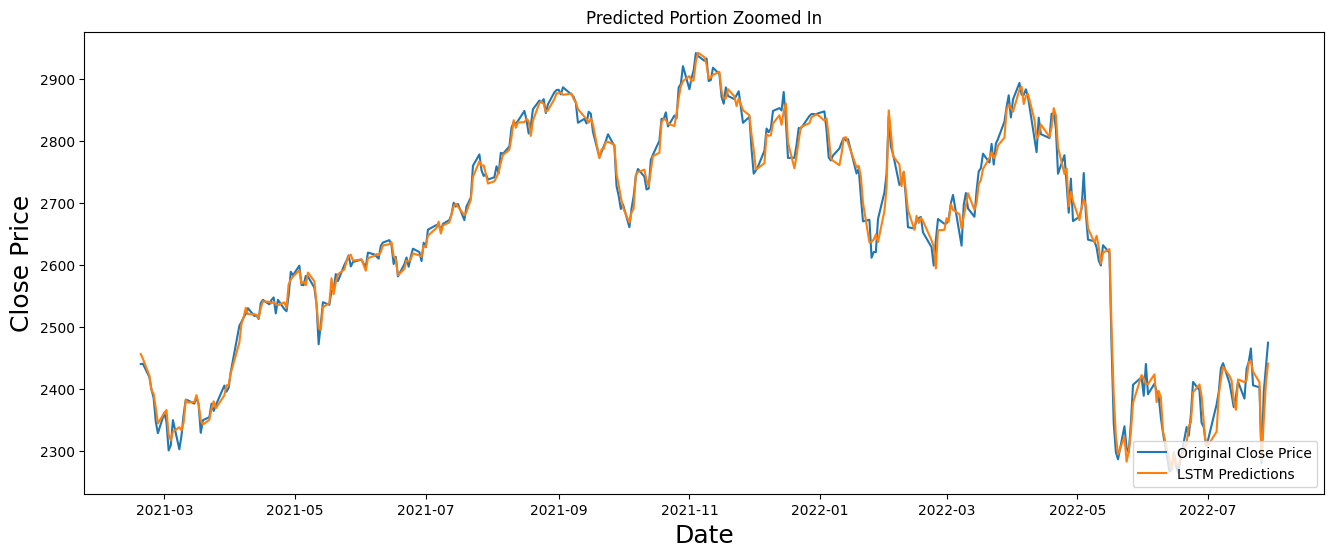

In [63]:
plt.figure(figsize=(16,6))
plt.title('Predicted Portion Zoomed In')
#plt.plot(dfviz['Close'])
plt.plot(dftestviz['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(trainTestdfviz['Close'])
plt.legend(['Original Close Price', 'LSTM Predictions'], loc='lower right')
rmseText = 'RMSE = {rmse}'.format(rmse = rmse)
plt.show()

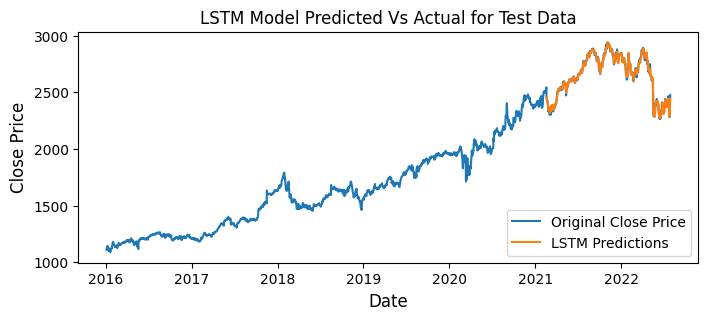

In [62]:
plt.figure(figsize=(8,3))
plt.title('LSTM Model Predicted Vs Actual for Test Data')
plt.plot(dfviz['Close'])
#plt.plot(dftestviz['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.plot(trainTestdfviz['Close'])
plt.legend(['Original Close Price', 'LSTM Predictions'], loc='lower right')
rmseText = 'RMSE = {rmse}'.format(rmse = rmse)
plt.show()

## 6) COMPARING TO LR-
Building a simple LR and comparing

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Open','High','Low']], df[['Close']], test_size=.2)

In [67]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE of LR model = ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE of LR model =  7.538092797810127


In [68]:
lrPreddf = pd.DataFrame()
lrPreddf['Date'] = df['Date'][training_data_len:]
lrPreddf['Close'] = lrmodel.predict(df[['Open','High','Low']][training_data_len:])
lrPreddf.head()

,Date,Close
1290,2021-02-18,2457.906832
1291,2021-02-19,2451.598125
1292,2021-02-22,2419.488807
1293,2021-02-23,2393.306085
1294,2021-02-24,2387.771952


### Plotting Original, LR Predictions & LSTM Predictions

RMSE b/w the two models =  9.885306486953414


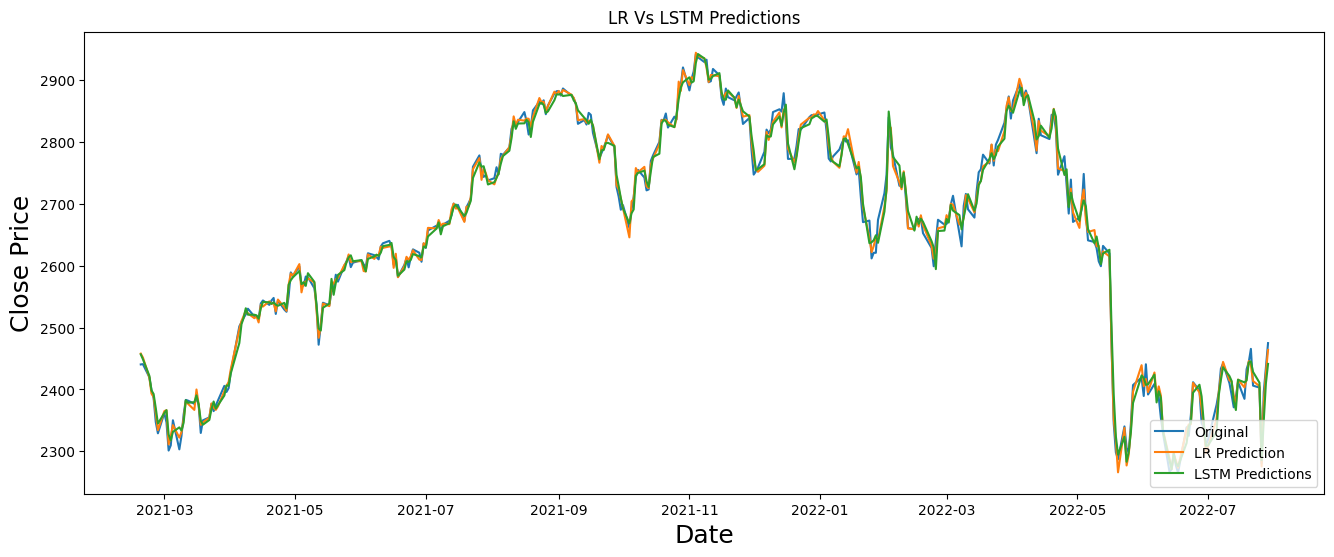

In [69]:
lrPredviz = lrPreddf
lrPredviz = lrPredviz.set_index('Date')

plt.figure(figsize=(16,6))
plt.title('LR Vs LSTM Predictions')
plt.plot(dfviz['Close'][training_data_len:])
plt.plot(lrPredviz['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(trainTestdfviz['Close'])
plt.legend(['Original','LR Prediction', 'LSTM Predictions'], loc='lower right')
print("RMSE b/w the two models = ",np.sqrt(mean_squared_error(lrPreddf['Close'],trainTestdf['Close'])))
plt.show()